# Distributions

**Distribution**: description of the variable
  * reporting the values that appear in the dataset
  * how many times each value appears

Distribution is one of the best ways to describe a variable (*defining its values*).

**Types of Distribution**:
  * **Normal**:
    * bell-shaped
    * aka Gaussian distribution

**Histogram**: graph that shows the *frequency* of each value
  * most common representation of a distribution
  * **frequency** means the *number of times* the value appears
  * complete description of a sample's distribution allows us to reconstruct the values in the sample (although not in their original order)
  * views distribution in class intervals (grouped data)
  
** Key Terms**:
  * ** Mode**: most common value

## Compute Frequencies

### Method 1: Python Dictionaries

Use dictionary to compute frequencies.

#### Dictionary's get() method
https://www.tutorialspoint.com/python/dictionary_get.htm

**dict.get(key, default=None)**  
The method get() returns a value for the given key. If key is not available then returns default value None.

  * **key** - This is the Key to be searched in the dictionary.

  * **default** - This is the Value to be returned in case key does not exist.

In [4]:
t=[0,1,2,3,0,2]

hist_d = {}
for x in t: # t is a sequence of values
        hist_d[x] = hist_d.get(x, 0) + 1 # dict get method to count each value

print hist_d

{0: 2, 1: 1, 2: 2, 3: 1}


### Method 2: Counter class

  * Counter class defined in collections module
  * Counter object - subclass of dictionary

In [5]:
from collections import Counter
counter = Counter (t)

print counter

Counter({0: 2, 2: 2, 1: 1, 3: 1})


### Method 3: Pandas value_counts() method

In [6]:
import pandas as pd
df = pd.DataFrame(t,columns=['value'])
df.value.value_counts().sort_index()

0    2
1    1
2    2
3    1
Name: value, dtype: int64

## Plotting Histogram

In [8]:
%matplotlib inline

### Method 1: pyplot.hist()

`plt.hist()` takes the sequence as the input, partitions it by the `bin` parameter, and counts the frequency for each `bin`.

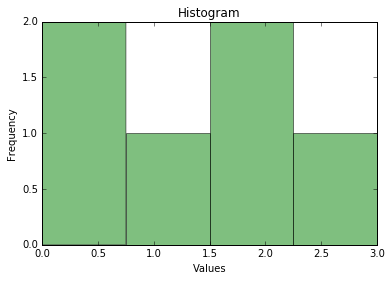

In [14]:
import matplotlib.pyplot as plt

plt.hist(t, bins=4, # partitions the sequence into 5 bins/categories
         facecolor='green', 
         alpha=0.50) #transparency

# labels
plt.title("Histogram")
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()

### Method 2: plt.bar()
`plt.bar()` takes two data arguments, each value (`x`) and their respective frequencies (`y`). Thus requiring, the computation of a sequence's frequency (histogram). 

The function does not bin the values to calculate their frequencies, unlike `plt.hist()`.

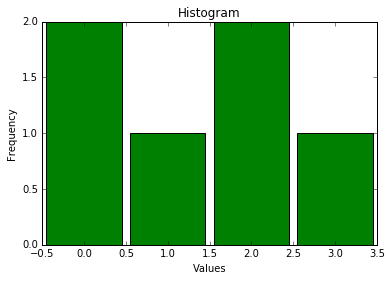

In [15]:
val = hist_d.keys() # plt.bar left param = x coordinates
freq = hist_d.values() # plt.bar height param = y coordinates/freq 

plt.bar(val, freq, width=0.9, color='green', align='center')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.show()

## Exercise - NSFG Dataset

### Birthweight in Ounces ('birthweight_oz')

Compute the histogram or frequencies for each possible birthweight value for live babies.

In [17]:
import nsfg

preg = nsfg.ReadFemPreg() # DataFrame
live = preg[preg.outcome==1] # filter for live births
birthoz_freq = live['birthwgt_oz'].value_counts().sort_index() # freq of birth weight
print birthoz_freq

0.0     1037
1.0      408
2.0      603
3.0      533
4.0      525
5.0      535
6.0      709
7.0      501
8.0      756
9.0      505
10.0     475
11.0     557
12.0     555
13.0     487
14.0     475
15.0     378
Name: birthwgt_oz, dtype: int64


#### Plot the Histogram

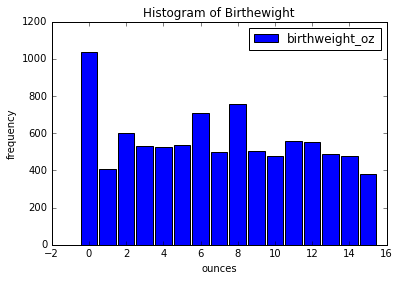

In [18]:
val = birthoz_freq.keys() # keys
freq = birthoz_freq.values # frequency

plt.bar(val, freq, width=0.9, align='center', label='birthweight_oz')
plt.xlabel('ounces')
plt.ylabel('frequency')
plt.title('Histogram of Birthewight')

plt.legend() # show legend
plt.show()

#### Interpretation

In theory, we expect the distribution to be *uniform* (all values have same frequency). Instead, **0** is more common than other values and **1** & **15** are less common. (Unusual to have a newborn weigh 0 oz) This may be due to respondents *rounding off birth weights* closer to an integer value.



### Mother's Age @ end of pregnancy ('agepreg')
Compute the histogram or frequencies for each possible age of mothers' at the end of their pregnancy.

In [26]:
import numpy as np

preg = nsfg.ReadFemPreg() # DataFrame
live = preg[preg.outcome==1] # filter for live births
agepreg = live['agepreg'].apply(np.floor) # applies np.floor to round down age
agepreg_freq = agepreg.value_counts().sort_index() # freq of age
print agepreg_freq

10.0      2
11.0      1
12.0      1
13.0     14
14.0     43
15.0    128
16.0    242
17.0    398
18.0    546
19.0    559
20.0    638
21.0    646
22.0    557
23.0    593
24.0    561
25.0    512
26.0    517
27.0    489
28.0    449
29.0    395
30.0    396
31.0    339
32.0    279
33.0    220
34.0    175
35.0    138
36.0     99
37.0     83
38.0     55
39.0     34
40.0     21
41.0     14
42.0      2
43.0      1
44.0      1
Name: agepreg, dtype: int64


#### Plot the histogram

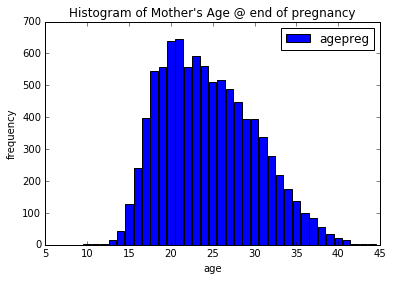

In [27]:
val = agepreg_freq.keys() # keys
freq = agepreg_freq.values # frequency

plt.bar(val, freq, width=0.9, align='center', label='agepreg')
plt.xlabel('age')
plt.ylabel('frequency')
plt.title("Histogram of Mother's Age @ end of pregnancy")

plt.legend() # show legend
plt.show()

Pandas' method `.idxmax()` returns the **index** of the max value of that series.

In [28]:
agepreg.value_counts().idxmax()

21.0

#### Interpretation

**Mode** is 21 years. Distribution is very roughly bell-shaped, but in this case the tail extends farther to the right than left.

Most mothers are in their 20s, fewer in their 30s.

### Pregnancy Length ('prglngth')

In [29]:
preg = nsfg.ReadFemPreg() # DataFrame
live = preg[preg.outcome==1] # filter for live births
prglngth = live['prglngth']
prglngth_freq = prglngth.value_counts().sort_index() # freq of pregnancy lengths
print prglngth_freq

0        1
4        1
9        1
13       1
17       2
18       1
19       1
20       1
21       2
22       7
23       1
24      13
25       3
26      35
27       3
28      32
29      21
30     138
31      27
32     115
33      49
34      60
35     311
36     321
37     455
38     607
39    4693
40    1116
41     587
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64


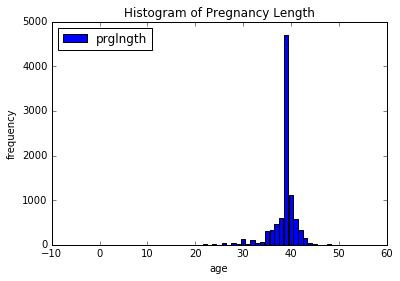

In [30]:
val = prglngth_freq.keys() # keys
freq = prglngth_freq.values # frequency

plt.bar(val, freq, width=0.9, align='center', label='prglngth')
plt.xlabel('age')
plt.ylabel('frequency')
plt.title("Histogram of Pregnancy Length")

plt.legend(loc='upper left') # show legend
plt.show()

In [32]:
prglngth.value_counts().idxmax()

39

#### Interpretation

**Mode** is 39 weeks. The left tail is longer than the right -- early babies are common, but pregnancies seldom go past 43 weeks (doctor's intervene if so).


## Outliers

**Histograms** easily identify most common values and the shape of the distribution. Unfortunately, *rare values are NOT always visible*.

**Tip**: Always check for outliers before going on.
  * **Outliers**: extreme values that might be errors in measurement & recording or accurate reports of rare events
  

### Domain Knowledge
Best way to handle outliers depends on domain knowledge.


### Ex: Pregnancy Lengths for Live Births

**Lowest Values**:
values < 10 weeks are certainly errors (not possible) -- most likely hinting at the outcome being incorrectly coded.

**Values 10-30 weeks** are hard to be sure of validity. Some may be errors, but some may represent premature babies.  

**Values > 30** are probably legitimate. (plausible)  
  * **Value 43 weeks** is common because *induced labor* is recommended if a pregnancy exceeds 42 weeks.
  * **50 weeks** seems medically unlikely
  


In [33]:
low_prglngth = live['prglngth'].sort_values().values

print low_prglngth[:10]

[ 0  4  9 13 17 17 18 19 20 21]


In [34]:
preg = nsfg.ReadFemPreg() # DataFrame
live = preg[preg.outcome==1] # filter for live births
prglngth = live['prglngth']

hi_prglngth = prglngth.sort_values().values
print hi_prglngth[-7:], '\n'

hi_prglngth_count = live['prglngth'].value_counts().sort_index()[-7:]
print hi_prglngth_count

[48 48 48 48 48 50 50] 

43    148
44     46
45     10
46      1
47      1
48      7
50      2
Name: prglngth, dtype: int64


## Plotting Multiple Distributions

Histograms are useful because they make the *most frequent values* immediately apparent. However, they are **NOT** the best choice for comparing multiple distributions.

#### Ex: Distribution of 1st babies vs. Others

There are fewer "first" born babies than others, so some of the apparent differences are due to *sample sizes*.

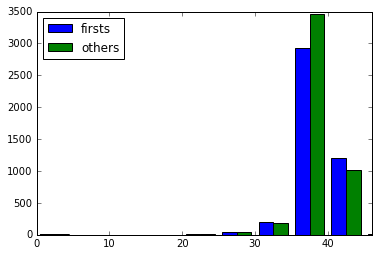

In [35]:
preg = nsfg.ReadFemPreg() # DataFrame
live = preg[preg.outcome==1] # filter for live births
firsts = live[live.birthord == 1]
firsts_prglngth = firsts['prglngth']

others = live[live.birthord != 1]
others_prglngth = others['prglngth']

plt.hist([firsts_prglngth, others_prglngth], # sequence of sequences - plt.hist treats each as separate histogram
         label=['firsts','others'])
plt.xlim((0,46))
plt.legend(loc='upper left')
plt.show()

## Summarizing Distributions

Summarize distributions w/ some *descriptive statistics*:
  * **Central Tendency**: Do the values tend to cluster around a particular point?
     * a characteristic of a sample or population
     * intuitively, it's an average or typical value
  * **Modes**: Is there more than 1 cluster?
     * the most, or one of the most, frequent value(s) in a sample
  * **Spread**: How much variability is there in the values?
    * a measure of how *spread out* the values in a distribution are
  * **Tails**: How quickly do the probabilities drop off as we move away from the modes?
    * the part of a distribution at the high & low *extremes*,
  * **Outliers**: Are there extreme values far from the modes?
    * a value far from the central tendency
    
Summary stats are designed to answer such questions.

**Summary Statistics**: statistics that quantifies some aspect of a distribution (*descriptive stats*). 
Summary stats are stats designed to answer such questions.
  * **Mean** is the most common summary stat, meant to describe the *central tendency* of the distribution.
    * sum of the values / number of values
  * **Standard Deviation**: a summary statistic used to measure the spread
    * square root of variance
  * **Variance**: a summary statistic often used to quantify spread
  * **Effect Size**: a summary statistic intended to quantify the size of an effect, like a *difference between groups*. 

### Mean vs. Average
"**Mean**" & "**Average** are often used interchangeably
  * **Mean** of a sample is the summary statistic computed by the formula (sum of values / number of values)
  * **Average** is one of several summary statistics you might choose to describe a central tendency
  
 
#### Example of Good/Bad Use Cases of Mean as a Summary Statistic to Describe
  * **Good**: Mean of apples' weight is representative of what most apples in the sample would weigh.
  * **Bad**: Mean of pumpkins would not be a good representation of what most pumpkins in the sample would weigh since they have more variation. If the sample average weight was 100 lbs, this is misleading since there is no typical pumpkin.
    * Need **Variance** as an additional summary statistic to provide better representation.

## Variance

A summary statistic intended to describe the **variability** or **spread** of a distribution.

**Variance** is the mean squared deviation. Likewise, the *square root* of variance is the **standard deviation** (deviation from the mean).

#### Computation using Pandas' data structures
Pandas has methods to compute **mean, variance, & standard deviation**.

mean = df.**mean()**  
variance = df.**var()**  
std_dev = df.**std()**  

#### Examples
  1. For all live births, the **mean pregnancy length** is 38.6 weeks & **standard deviation** is 2.7 weeks. This means that we can expect *deviations* of 2-3 weeks to be common.
  
  2. **Variance** of pregnancy length is 7.3, which is hard to interpret given the units are weeks^2 ("square weeks). Variance is useful in some calculations, but *not a good summary statistic*.


## Effect Size

**Effect Size** is a summary statistic intended to describe *the size of an effect*. For example, the difference b/w 2 groups, one choice is the difference in the means.

#### Example: Mean Pregnancy Length
The mean pregnancy length for *first babies* is 38.601; for *other babies* it is 38.523. The difference is **0.078 weeks** (~ 13 hours). The difference is about 0.2%, a fraction of the typical pregnancy length.

Assumming this estimate is accurate, such difference would have **no** practical consequences. 

In [33]:
firsts.prglngth.mean() - others.prglngth.mean()

0.078037266777549519

### Alternative Method: Cohen's d statistic
Alternative method to convey the **size of effect** by comparing the *difference between* groups to the *variability within* groups. The difference in means are measured n *standard deviations*.

d = (mean_group1 - mean_group2) / (pooled std)

#### Python Code

In [34]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [35]:
import math

preg = nsfg.ReadFemPreg() # DataFrame
live = preg[preg.outcome==1] # filter for live births
firsts = live[live.birthord == 1]
firsts_prglngth = firsts['prglngth']

others = live[live.birthord != 1]
others_prglngth = others['prglngth']

d = CohenEffectSize(firsts_prglngth, others_prglngth)
print "The difference in means is: %f standard deviations." % (d)

The difference in means is: 0.028879 standard deviations.
